#handling outliers

In [1]:
import pandas as pd
data=pd.read_csv(r'C:\Users\bala.vivek\Desktop\houseprice\train_titan.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Age'>

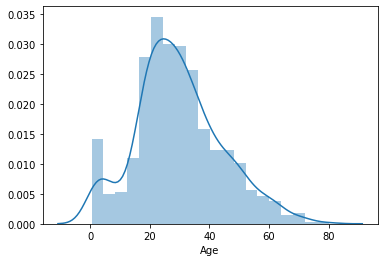

In [5]:
import seaborn as sns
sns.distplot(data['Age'].dropna())

<AxesSubplot:xlabel='Age'>

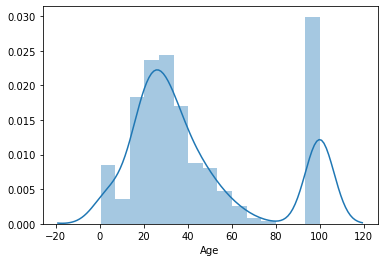

In [6]:
sns.distplot(data['Age'].fillna(100)) #add outlier for experiment

Text(0, 0.5, 'No of passenger')

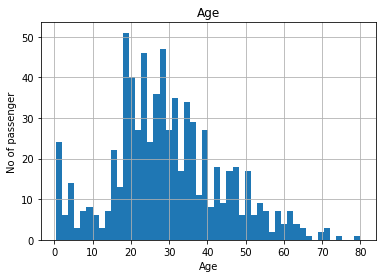

In [8]:
figure=data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

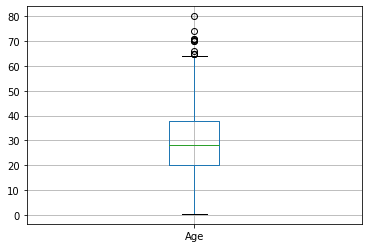

In [9]:
figure=data.boxplot(column="Age")

In [11]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

uppper_boundary=data['Age'].mean() + 3* data['Age'].std()
lower_boundary=data['Age'].mean() - 3* data['Age'].std()
print(lower_boundary), print(uppper_boundary),print(data['Age'].mean())

-13.88037434994331
73.27860964406095
29.69911764705882


(None, None, None)

Text(0, 0.5, 'No of passenger')

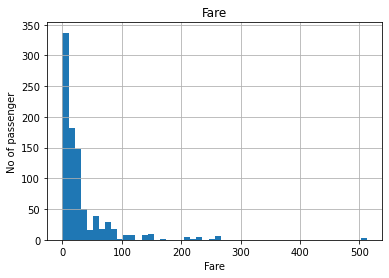

In [13]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

In [14]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [15]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=data.Fare.quantile(0.75)-data.Fare.quantile(0.25)

In [16]:
lower_bridge=data['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [17]:
#### Extreme outliers
lower_bridge=data['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=data['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [19]:
df = data.copy()
df.loc[df['Age']>=73,'Age']=73
df.loc[df['Fare']>=100,'Fare']=100

Text(0, 0.5, 'No of passenger')

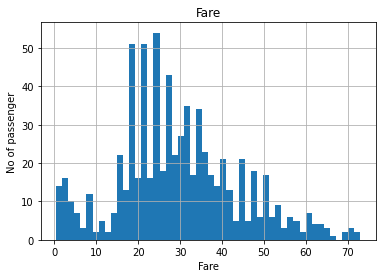

In [20]:
figure=df.Age.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passenger')

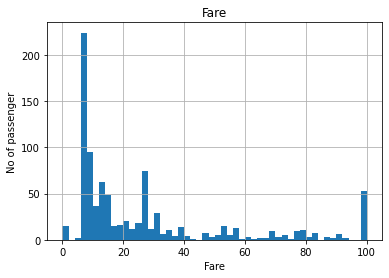

In [21]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [23]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

In [24]:
from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.664179104477612
roc_auc_score: 0.6576817766960754


In [25]:
##Random Fores classifier

from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)


In [26]:
from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6604477611940298
roc_auc_score: 0.6885001521143901
